In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plot_yar.plot import plot_approx

plt.rc('font', size=14) 

In [3]:
data = pd.read_excel('WWc.xlsx')
data

,U,I,P,I out,obj
0,2.44,0.14,0.3416,0.199,green
1,2.58,0.52,1.3416,0.740,NaN
2,2.66,1.04,2.7664,1.430,NaN
3,2.68,1.29,3.4572,1.940,NaN
4,2.70,1.52,4.1040,2.230,NaN
5,2.73,1.92,5.2416,2.800,NaN
6,2.76,2.68,7.3968,3.750,NaN
7,2.79,3.32,9.2628,4.660,NaN
8,2.86,5.40,15.4440,7.160,NaN
9,2.88,6.10,17.5680,7.750,NaN


In [4]:
green = data[data[data.obj=='green'].index[0] : data[data.obj=='red'].index[0]-1]
red = data[data[data.obj=='red'].index[0] : data[data.obj=='blue'].index[0]-1]
blue = data[data[data.obj=='blue'].index[0] : data[data.obj=='laser'].index[0]-1]
laser = data[data[data.obj=='laser'].index[0]:-1]

In [5]:
blue

,U,I,P,I out,obj
23,2.77,0.36,0.9972,0.77,blue
24,2.96,0.63,1.8648,1.42,NaN
25,3.17,0.94,2.9798,2.26,NaN
26,3.69,1.50,5.5350,4.42,NaN
27,4.12,2.38,9.8056,6.29,NaN
28,4.60,3.20,14.7200,8.37,NaN


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/plot_yar/plot.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_data_ful = np.array(X_data)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/plot_yar/plot.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y_data_ful = np.array(Y_data)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-

Coeffs table 0: 

  coeffs  coeffs_values  standard error  relative se, %
0    a_0      5.543E-01       1.715E-03       3.094E-01
1    a_1      6.049E-01       1.020E-01       1.686E+01

Standart_error_Y_0 = 4.029E-01


Latex code of coeffs table 0: 

\begin{table}[H]
\centering
\caption{Коэффициенты аппроксимации}
\label{coeffs_table}
\begin{tabular}{lrrr}
\toprule
coeffs &  coeffs\_values &  standard error &  relative se, \% \\
\midrule
   a\_0 &      5.543E-01 &       1.715E-03 &       3.094E-01 \\
   a\_1 &      6.049E-01 &       1.020E-01 &       1.686E+01 \\
\bottomrule
\end{tabular}
\end{table}

Coeffs table 1: 

  coeffs  coeffs_values  standard error  relative se, %
0    a_0      4.523E-01       1.139E-04       2.518E-02
1    a_1      3.580E-01       3.985E-02       1.113E+01

Standart_error_Y_1 = 3.365E-01


Latex code of coeffs table 1: 

\begin{table}[H]
\centering
\caption{Коэффициенты аппроксимации}
\label{coeffs_table}
\begin{tabular}{lrrr}
\toprule
coeffs &  coeffs\_val

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/plot_yar/plot.py:178: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_output = output.to_latex(index = False, position = 'H', caption = 'Коэффициенты аппроксимации', label = 'coeffs_table')
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/plot_yar/plot.py:178: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_output = output.to_latex(index = False, position = 'H'

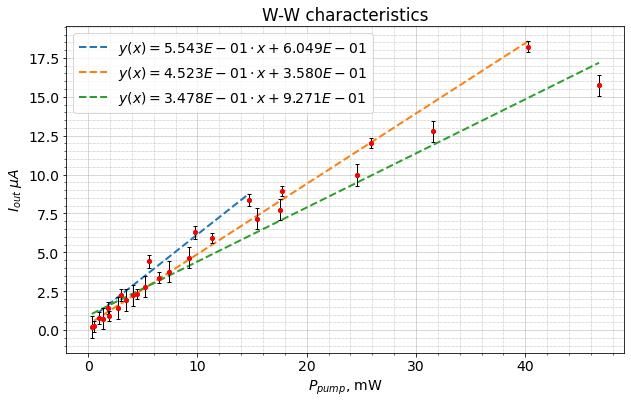

In [14]:
plot_approx(
    [np.array(blue['P']), np.array(red['P']), np.array(green['P'])],
    [np.array(blue['I out']), np.array(red['I out']), np.array(green['I out'])],
    'linear',
    plot_name='W-W-led',
    plot_title='W-W characteristics',
    x_label=r'$P_{pump}$, mW',
    y_label=r'$I_{out},\; \mu A$',
    to_latex=True
)